In [ ]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='bs4')


import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

data.sample(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,headlines,text
56913,"Mona Lisa was once stolen from Louvre, recover...","Italian artist Leonardo da Vinci's Mona Lisa, ..."
32680,What caused dust storm which killed over 100 i...,Western disturbance-induced cyclonic circulati...
10244,HC grants DU more time to check student union ...,The Delhi High Court has granted Delhi Univers...
38280,"Akhilesh, Mulayam to fight '19 polls from Kann...",Samajwadi Party supremo Akhilesh Yadav will co...
11858,Govt employees demand restoration of old pensi...,Central and state government employees on Sund...
2570,Is deewar ka saaf mann aur hriday bhi hai: Seh...,Wishing ex-India captain Rahul Dravid on his 4...
41240,Girl in Haryana kills self for not topping class,A Class 11 girl in Haryana allegedly shot hers...
34026,Gold worth Ã¢ÂÂ¹2.6 crore found under seats o...,Unclaimed gold worth Ã¢ÂÂ¹2.6 crore was recov...
89057,"No extradition request for Dawood Ibrahim, Haf...","Responding to an RTI query, the External Affai..."
49321,FB files patent for tech to detect users' econ...,Facebook has filed a patent for a technology t...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
print('전체 headline 데이터', len(data['headlines']))
print('유니크한 headline 데이터: ', (data['headlines'].nunique()))
print('전체 text 데이터', len(data['text']))
print('유니크한 text데이터', data['text'].nunique())

전체 headline 데이터 98401
유니크한 headline 데이터:  98280
전체 text 데이터 98401
유니크한 text데이터 98360


In [ ]:
data.drop_duplicates(subset=['text'], inplace=True)

In [ ]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [ ]:
# 정규화 사전
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}
# 불용어 리스트 확인
print('불용어 개수 : ', len(stopwords.words('english')))
print(stopwords.words('english'))

불용어 개수 :  179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', '

In [ ]:
from collections import Counter
def preprocess_sentence(sentence, remove_stopwords=True):
  sentence = sentence.lower()
  sentence = BeautifulSoup(sentence, 'lxml').text # remove html tag
  sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 제거
  sentence = re.sub('"', '', sentence)
  sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")])
  sentence = re.sub(r"'s\b", "", sentence)
  sentence = re.sub("[^a-zA-Z0-9]", " ", sentence)

  # 단어 내에 같은 문자들이 3개 이상 연속해서 반복되면 삭제하고 최대 2개까지만 반복되도록 만들어줌 (ex. iiit -> iit)
  b = []
  for i in sentence.split():
    a = list(i)
    char_cnt = 0
    for j in a:
      if a.count(j) >= 3:
        a.remove(j)
    word_a = ''.join(a)
    b.append(word_a)
  sentence = ' '.join(b)


  # 불용어 제거
  if remove_stopwords:
    tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)

  # 불용어 미제거
  else:
    tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
  return tokens
# 샘플 문장을 확인

temp_text = 'Everything I bought was great, infact I ordered iiiiit twice and the third ordered 123 was<br />for my mother and father. '
temp_summary = 'Great way to start (or finish) the day!!!'

print("text: ", preprocess_sentence(temp_text))
print("summary:", preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

text:  everything bought great infact ordered iit twice third ordered 123 wasfor mother father
summary: great way to start the day


In [ ]:
# data['text'] 부분 전처리 진행

clean_text = []
for s in data['text']:
  clean_text.append(preprocess_sentence(s))

print('Text 전처리 후 결과 : ', clean_text[:5])

Text 전처리 후 결과 :  ['saurav kant alumnus upgrad iit pg program machine learning artficial intlligence sr ystems ngineer infosys almost years work xprience program upgrad 360 dgree career support helped transition data scientist tech mahindra 90 salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending 200 cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bokmyshow ubereats cult fit', 'new zealand dfeated india wickets fourth odi hamilton thursday win first match five match odi series india lost iternational match rohit sharma captaincy 12 consecutive victories dating back march 2018 match witnessed india getting 92 seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save 46 800 taxes plan provides life cover age 100 years also 

In [ ]:
# headline 부분 전처리 진행
clean_headlines = []
for s in data['headlines']:
  clean_headlines.append(preprocess_sentence(s, False))

print('Headlines 전처리 후 결과 : ', clean_headlines[:5])

<ipython-input-7-38fe2475afb8>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentence = BeautifulSoup(sentence, 'lxml').text # remove html tag


Headlines 전처리 후 결과 :  ['upgrad learner switches to career in ml al with 90 salary hike', 'delhi techie wins free food from swiggy for one year on cred', 'new zealand end rohit sharma led india 12 match wining streak', 'aegon life iterm insurance plan helps customers save tax', 'have known hirani for yrs what if metoo claims are not true sonam']


In [ ]:
data['text'] = clean_text
data['headlines'] = clean_headlines

data.replace('', np.nan, inplace=True)

data.isnull().sum()

headlines    0
text         0
dtype: int64

In [ ]:

data.replace('', np.nan, inplace=True)

data.isnull().sum()

headlines    0
text         0
dtype: int64

텍스트 길이 최대:  60
텍스트 길이 최소:  1
텍스트 길이 평균:  36.42161447742985
헤드라인 길이 최대:  16
헤드라인 길이 최소:  1
헤드라인 길이 평균:  9.569611630744205


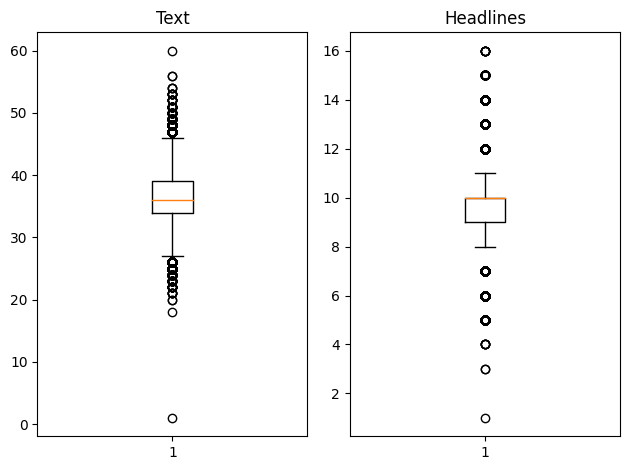

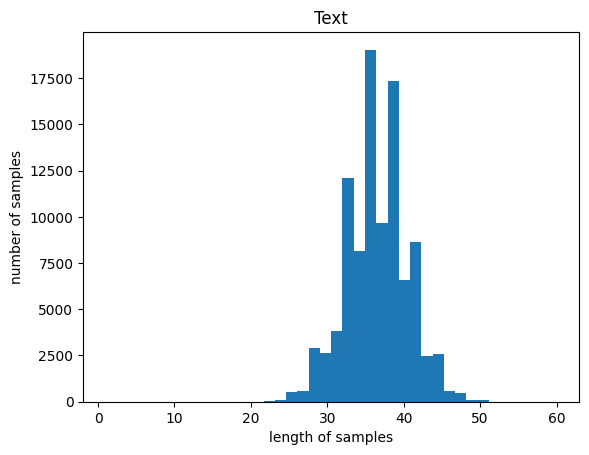

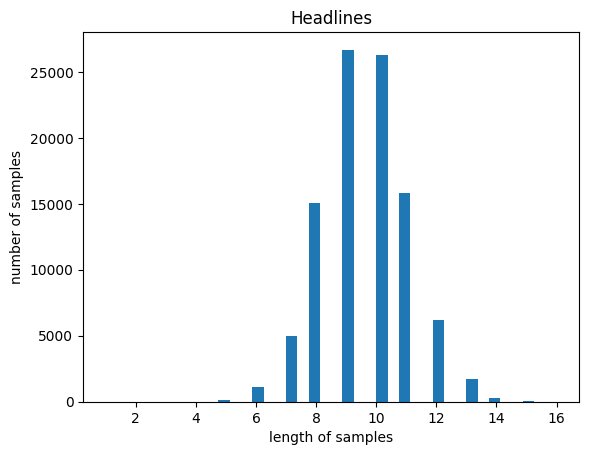

In [ ]:
import matplotlib.pyplot as plt

text_len = [len(x.split()) for x in data['text']]
headlines_len = [len(x.split()) for x in data['headlines']]

print('텍스트 길이 최대: ', np.max(text_len))
print('텍스트 길이 최소: ', np.min(text_len))
print('텍스트 길이 평균: ', np.mean(text_len))
print('헤드라인 길이 최대: ', np.max(headlines_len))
print('헤드라인 길이 최소: ', np.min(headlines_len))
print('헤드라인 길이 평균: ', np.mean(headlines_len))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('Headlines')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# 텍스트, 헤드라인 최대 길이 설정
max_text_len = 60
max_headline_len = 16

# 최대 길이를 기준으로 나눴을때 최대 길이보다 짧은 데이터의 비율을 출력해주는 함수 정의
def below_threshold_len(max_len, list):
  count = 0
  for s in list:
    if len(s.split()) <= max_len:
      count += 1

  print(f'길이가 {max_len}보다 짧은 데이터의 비율 : {count/len(list)}')


# 비율 확인
below_threshold_len(max_text_len, data['text'])
below_threshold_len(max_headline_len, data['headlines'])

길이가 60보다 짧은 데이터의 비율 : 1.0
길이가 16보다 짧은 데이터의 비율 : 1.0


In [ ]:
data['decoder_input'] = data['headlines'].apply(lambda x : 'starttoken ' + x)
data['decoder_output'] = data['headlines'].apply(lambda x : x + ' endtoken')

In [ ]:
encoder_input = np.array(data['text'])

decoder_input = np.array(data['decoder_input'])
decoder_output = np.array(data['decoder_output'])

# 데이터 섞어주기
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)

encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_output = decoder_output[indices]

# 샘플 추출
encoder_input[:5]

array(['government planned change security features 00 500 banknotes every years acordance global standards keep check counterfeiting move came fake currency notes rcovered post demonetisation security features newly introduced notes old notes mha officials said',
       'eight players bought csk first day ipl auction saturday aged 30 imran tahir aged 38 oldest followed hrbhajan singh shane watson three players followed dwayne bravo faf du plesis ambati rayudu kedar jadhav karn sharma',
       'iit bombay professor rohit srivstava working cancer reatment based gold nanostructures would cost 10 00 laser activated nanoshells could deliver drug cancer site heated around 50 speaking bengaluru meet srivstava said technology would help healing cancer without surgery chemotherapy cost lakh average',
       'madhya pradesh government hold new tests 60 00 people could give tests police constable jobs dhaar cards aspirants also alleged dhaar cards identity could verified technical problems aroun

In [ ]:
val_size = int(encoder_input.shape[0] * 0.2)

encoder_input_train = encoder_input[:-val_size]
decoder_input_train = decoder_input[:-val_size]
decoder_output_train = decoder_output[:-val_size]

encoder_input_test = encoder_input[-val_size:]
decoder_input_test = decoder_input[-val_size:]
decoder_output_test = decoder_output[-val_size:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 78688
훈련 레이블의 개수 : 78688
테스트 데이터의 개수 : 19672
테스트 레이블의 개수 : 19672


In [ ]:
# 토크나이저 설정
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(encoder_input_train)

# 단어 빈도수 체크
threshold = 4
total_cnt = len(src_tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in src_tokenizer.word_counts.items():
  total_freq = total_freq + value

  if value < threshold:
    rare_cnt += 1
    rare_freq = rare_freq + value


print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 71893
등장 빈도가 3번 이하인 희귀 단어의 수: 41030
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 30863
단어 집합에서 희귀 단어의 비율: 57.070924846647095
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.164116595934778


In [ ]:
src_vocab = 30847
src_tokenizer = Tokenizer(num_words = src_vocab)
src_tokenizer.fit_on_texts(encoder_input_train)

# 정수 인코딩
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train)
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 샘플 출력하여 확인
print(encoder_input_train[:3])

[[8, 1726, 550, 137, 814, 25, 310, 11602, 276, 23, 8353, 460, 2932, 732, 1234, 27408, 379, 235, 517, 1598, 1508, 1235, 176, 1461, 137, 814, 1956, 1343, 1508, 13, 1508, 27409, 92, 1], [386, 484, 1093, 2714, 7, 44, 454, 1363, 89, 897, 161, 1792, 9571, 897, 1620, 2364, 995, 2694, 49, 4163, 5700, 31, 484, 995, 4419, 6830, 9761, 6091, 8119, 10796, 8354, 9572, 2220, 244], [1798, 1612, 2380, 857, 7992, 274, 1083, 751, 34, 355, 22, 603, 52, 25, 4889, 7557, 88, 2516, 1176, 1083, 996, 8233, 69, 169, 348, 372, 725, 7992, 1, 223, 22, 151, 11905, 1083, 200, 1831, 14207, 603, 64, 1136]]


In [ ]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)


threshold = 4
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 31846
등장 빈도가 3번 이하인 희귀 단어의 수: 18182
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 13664
단어 집합에서 희귀 단어의 비율: 57.09351252904603
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.2954203888281053


In [ ]:
tar_vocab = 13676
tar_tokenizer = Tokenizer(num_words=tar_vocab)
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_output_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train)
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_output_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_output_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 23, 396, 3, 526, 347, 1700, 6, 11983, 4, 131], [1, 102, 501, 1660, 1907, 7, 219, 1089, 52, 79, 2051, 242], [1, 790, 1357, 2777, 510, 7, 57, 50, 574, 5815, 6702, 451], [1, 103, 565, 4710, 1992, 265, 184, 3, 45, 335, 3, 174, 1378, 88], [1, 254, 1011, 349, 717, 7912, 6, 930, 7474, 29]]
target
decoder  [[23, 396, 3, 526, 347, 1700, 6, 11983, 4, 131, 2], [102, 501, 1660, 1907, 7, 219, 1089, 52, 79, 2051, 242, 2], [790, 1357, 2777, 510, 7, 57, 50, 574, 5815, 6702, 451, 2], [103, 565, 4710, 1992, 265, 184, 3, 45, 335, 3, 174, 1378, 88, 2], [254, 1011, 349, 717, 7912, 6, 930, 7474, 29, 2]]


In [ ]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 78688
훈련 레이블의 개수 : 78688
테스트 데이터의 개수 : 19672
테스트 레이블의 개수 : 19672


In [ ]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=max_text_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=max_text_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=max_headline_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=max_headline_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=max_headline_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=max_headline_len, padding='post')

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 인코더 설계 시작
embedding_dim = 256
hidden_size = 128

# 인코더
encoder_inputs = Input(shape=(max_text_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.5)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.5)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.5)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)


# 디코더 설계
decoder_inputs = Input(shape=(None, ))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.5)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs)


# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 60)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 60, 256)              7896832   ['input_1[0][0]']             
                                                                                                  
 lstm (LSTM)                 [(None, 60, 128),            197120    ['embedding[0][0]']           
                              (None, 128),                                                        
                              (None, 128)]                                                        
                                                                                              

In [ ]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])

# 어텐션의 결과와 디코더의 hidden_state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 60)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 60, 256)              7896832   ['input_1[0][0]']             
                                                                                                  
 lstm (LSTM)                 [(None, 60, 128),            197120    ['embedding[0][0]']           
                              (None, 128),                                                        
                              (None, 128)]                                                        
                                                                                            

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train,
                    validation_data=([encoder_input_test, decoder_input_test], decoder_target_test),
                    batch_size=256, callbacks=[es], epochs=30)

Epoch 1/30
308/308 [==============================] - 39s 100ms/step - loss: 4.8928 - val_loss: 4.5094
Epoch 2/30
308/308 [==============================] - 26s 84ms/step - loss: 4.5348 - val_loss: 4.4490
Epoch 3/30
308/308 [==============================] - 26s 84ms/step - loss: 4.4648 - val_loss: 4.3953
Epoch 4/30
308/308 [==============================] - 27s 86ms/step - loss: 4.4111 - val_loss: 4.3416
Epoch 5/30
308/308 [==============================] - 26s 85ms/step - loss: 4.3645 - val_loss: 4.3012
Epoch 6/30
308/308 [==============================] - 26s 84ms/step - loss: 4.3044 - val_loss: 4.2277
Epoch 7/30
308/308 [==============================] - 26s 85ms/step - loss: 4.2199 - val_loss: 4.1481
Epoch 8/30
308/308 [==============================] - 26s 85ms/step - loss: 4.1343 - val_loss: 4.0679
Epoch 9/30
308/308 [==============================] - 26s 84ms/step - loss: 4.0598 - val_loss: 3.9987
Epoch 10/30
308/308 [==============================] - 26s 84ms/step - loss: 3.98

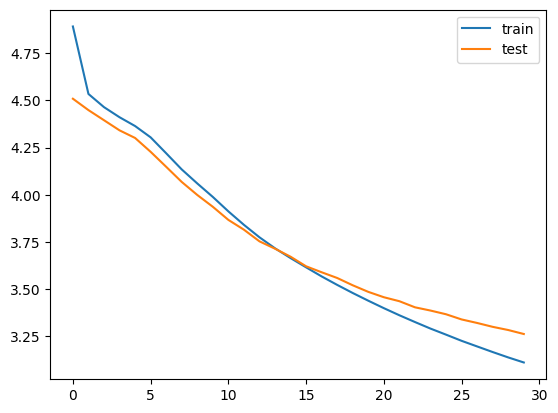

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# model.save('/content/drive/MyDrive/new_project/project2/model/model_english100.h5')

In [ ]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어

# 인코더
encoder_model = Model(inputs = encoder_inputs, outputs = [encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size, ))
decoder_state_input_c = Input(shape=(hidden_size, ))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태를 이전 시점의 상태로 사용
# 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은틱 상태와 셀 상태인 state_h와 state_c를 버리지 않음
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# 어텐션 함수
decoder_hidden_state_input = Input(shape=(max_text_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat)

# 최종 디코더 모델
decoder_model = Model(
     [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
     [decoder_outputs2] + [state_h2, state_c2])
def decode_sequence(input_seq):
  # 입력으로부터 인코더의 상태를 얻음
  e_out, e_h, e_c = encoder_model.predict(input_seq)

  # <SOS>에 해당하는 토큰 생성
  target_seq = np.zeros((1,1))
  target_seq[0,0] = tar_word_to_index['starttoken']

  stop_condition = False
  decoded_sentence = ''
  while not stop_condition:

    output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
    sampled_token_index = np.argmax(output_tokens[0, -1, :])
    sampled_token = tar_index_to_word[sampled_token_index]

    if (sampled_token != 'endtoken'):
      decoded_sentence += ' '+sampled_token

    # <EOS>에 도달하거나 최대 길이를 넘으면 중단.
    if (sampled_token == 'endtoken' or len(decoded_sentence.split()) >= (max_headline_len - 1)):
      stop_condition = True

    # 길이가 1인 타겟 시퀀스를 업데이트
    target_seq = np.zeros((1,1))
    target_seq[0,0] = sampled_token_index

    # 상태를 업데이트 합니다.
    e_h, e_c = h, c

  return decoded_sentence

In [ ]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['starttoken']) and i!=tar_word_to_index['endtoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [ ]:
for i in range(250, 260):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, max_text_len)))
    print("\n")

원문 : resigning intel ceo violating company policy brian krzanich stands lose 45 million according bloomberg krzanich resigned company learned past consensual relationship intel mployee notably krzanich cash incentive awards guaranteed case stepped voluntarily terminated cause 
실제 요약 : intel brian to give up 45 mn by resigning as ceo 
1/1 [==============================] - 0s 21ms/step
예측 요약 :  ex ceo ceo quits as ceo of his own company


원문 : central vigilance commission warned regularities jwellery sector year pnb scam became public meeting reportedly held january 2017 chief vigilance officers 10 banks including pnb dicuss regularities meeting particularly focussed fraud committed winsome diamonds jatin mehta fled defaulting 00 crore worth loans 
실제 요약 : cvc warned about jwellery sector an year before pnb scam 
1/1 [==============================] - 0s 21ms/step
예측 요약 :  govt to pay crore to pay crore to pay crore


원문 : talking ecosystem drones minister state civil aviation jayant si

In [ ]:
result = []

for i in range(200, 300):
    text =  seq2text(encoder_input_test[i])
    origin_sum = seq2summary(decoder_input_test[i])
    new_sum = decode_sequence(encoder_input_test[i].reshape(1, max_text_len))

    result.append([text, origin_sum, new_sum])


result = pd.DataFrame(result, columns=['text', 'origin_sum', 'new_sum'])


In [ ]:
result.to_excel('/content/drive/MyDrive/new_project/project2/result_30.xlsx')

In [ ]:
df100 = pd.read_excel('/content/drive/MyDrive/new_project/project2/result.xlsx')
df100.head()

,Unnamed: 0,text,origin_sum,new_sum
0,0,india first odi england former england captain...,can we have aus back ex eng captain as india w...,ustralia captain ustralia to win ustralia odi...
1,1,punjab director general police suresh arora sa...,punjab police to tackle criminals on social me...,delhi govt to launch facebook mesages on fb
2,2,rbi asked cooperative societies use word bank ...,rbi asks not to use bank in names,rbi asks rbi to ban bank of bank accounts
3,3,hours wishing pm narendra modi birthday congre...,manish posts abusive tweets against,ye nahi nahi nahi pm modi to rahul gandhi
4,4,punjab police saturday arrested another member...,shooter involved in singer parmish verma attac...,punjab police arrests singer who arrested for...


In [ ]:
df100['text'][0]

'india first odi england former england captain michael vaughan tweted ustralia back please england beaten ustralia odi series btween two sides india went win first odi rgistered sixth straight t20i series win beating england last week '

,headlines,text,decoder_input,decoder_output


In [ ]:
df100['decoder_input'] = df100['origin_sum'].apply(lambda x : 'starttoken ' + x)
df100['decoder_output'] = df100['origin_sum'].apply(lambda x : x + ' endtoken')


encoder_input = np.array(df100['text'])

decoder_input = np.array(df100['decoder_input'])
decoder_output = np.array(df100['decoder_output'])

In [ ]:
# 정수 인코딩
# 텍스트 시퀀스를 정수 시퀀스로 변환

encoder_input_df = src_tokenizer.texts_to_sequences(encoder_input)


# 텍스트 시퀀스를 정수 시퀀스로 변환

decoder_input_df = tar_tokenizer.texts_to_sequences(decoder_input)
decoder_target_df = tar_tokenizer.texts_to_sequences(decoder_output)


encoder_input_train = pad_sequences(encoder_input_train, maxlen=max_text_len, padding='post')
encoder_input_df = pad_sequences(encoder_input_df, maxlen=max_text_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=max_headline_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=max_headline_len, padding='post')
decoder_input_df = pad_sequences(decoder_input_df, maxlen=max_headline_len, padding='post')
decoder_target_df = pad_sequences(decoder_target_df, maxlen=max_headline_len, padding='post')

In [ ]:
result2 = []

for i in range(len(df100)):
    text =  seq2text(encoder_input_df[i])
    origin_sum = seq2summary(decoder_input_df[i])
    new_sum = decode_sequence(encoder_input_df[i].reshape(1, max_text_len))

    result2.append([text, origin_sum, new_sum])


result2 = pd.DataFrame(result2, columns=['text', 'origin_sum', 'new_sum_30'])

1/1 [==============================] - 0s 22ms/step


In [ ]:
df100_raw = pd.read_excel('/content/drive/MyDrive/new_project/project2/result.xlsx')
df100_raw.head()

,Unnamed: 0,text,origin_sum,new_sum
0,0,india first odi england former england captain...,can we have aus back ex eng captain as india w...,ustralia captain ustralia to win ustralia odi...
1,1,punjab director general police suresh arora sa...,punjab police to tackle criminals on social me...,delhi govt to launch facebook mesages on fb
2,2,rbi asked cooperative societies use word bank ...,rbi asks not to use bank in names,rbi asks rbi to ban bank of bank accounts
3,3,hours wishing pm narendra modi birthday congre...,manish posts abusive tweets against,ye nahi nahi nahi pm modi to rahul gandhi
4,4,punjab police saturday arrested another member...,shooter involved in singer parmish verma attac...,punjab police arrests singer who arrested for...


In [ ]:
df_vs = df100_raw.merge(result2, how='left', on='text')

In [ ]:
df_vs.to_excel('/content/drive/MyDrive/new_project/project2/df_vs_english_30.xlsx', index = False)